# Effects of Employment Rate on The US Dollar
---

## Part 0: Background Knowledge
---
### What is Forex?
***Definition*** **:**  Forex (FX) refers to the global electronic marketplace for trading international currencies and currency derivatives. It has no central physical location, yet the forex market is the largest, most liquid market in the world by trading volume, with trillions of dollars changing hands every day. Most of the trading is done through banks, brokers, and financial institutions.

This is the same market that the US Dollar is traded on with institutions buying and selling the currency that they believe is going to increase in price.

### How Pairs Are Organized
For currency pairs it is necessary to buy a currency in reference to another currency. There is a standardized way that they are organized to know which currency you are expecting to rise or fall. For example let us reference the currency pair USD/JPY. In these cases the first currency listed (USD) is considered the base currency and the second currency (JPY) is considered the quote currency

### What do Base and Quote Currencies Even Mean?
What you are analyzing when you look at a price in reference to base and quote currencies is essentially what the base currency is worth in context to the quote currency. In other words how much of the quote currency will you receive for one unit of the base currency. With in the case of USD/JPY which currently has a value of 151.36. This means that for 1 US Dollar you will receive 151.36 Japanese Yen.

### How to Determine the Weakness and Strength of a Currency?
With this in hand we are able to understand that when a base currency has a strong economy then it will be worth more in the quote currency, and the opposite being true in when the economy of the base currency is weak it will be worth less in the quote currency.

### How to Make Profit?
Using this forex traders are able to make profits on the rise and fall of a currency. Where if you believe that the currency is going to fall in reference to the quote currency you buy alot of the quote currency and when it reaches your profit point you buy the base currency back with the quote currency you bought initially. And vice versa if you believe it is going to rise you buy alot of the base currency and when it is worth more in the quote currency then you exchange it for a profit.

### Now What Is This Study About?
This study is to find out whether or not we can use fundamental analysis (formal analysis technique that takes into consideration variables such as news, interest rates, etc.) in the form of analyzing unemployment rates to determine whether or not to buy a currency. The goal is to potentially find a correlation between employment rate and prices which will help us make the most profit.


## Part 1: Import Essential Libraries

---

In [1]:
import pandas as pd
import numpy as np
import scipy
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

## Part 2: Import Datasets

---

**TASK 2.1:** First we want to import all the necessary forex pairs

In [2]:
audusd_df = pd.read_csv('forexPairs/audusd.csv')
eurusd_df = pd.read_csv('forexPairs/eurusd.csv')
gbpusd_df = pd.read_csv('forexPairs/gbpusd.csv')
usdchf_df = pd.read_csv('forexPairs/usdchf.csv')
usdjpy_df = pd.read_csv('forexPairs/usdjpy.csv')

---

**TASK 2.2:** Next we want to import datasets about the relevant unemployment news.

In [3]:
unemployment_df = pd.read_csv('news/unemployment.csv')
news_df = pd.read_csv('news/important_news.csv')

## Part 3: Data Cleaning

---

**TASK 3.1:** Fixing Forex Pairs

In [4]:
audusd_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-21,0.901120,0.901632,0.895255,0.900982,0.900982,0.0
1,2014-02-24,0.897908,0.901957,0.893975,0.897747,0.897747,0.0
2,2014-02-25,0.903677,0.904323,0.900739,0.903751,0.903751,0.0
3,2014-02-26,0.901145,0.902690,0.895977,0.900982,0.900982,0.0
4,2014-02-27,0.896379,0.896861,0.890710,0.896379,0.896379,0.0
...,...,...,...,...,...,...,...
2604,2024-02-15,0.649880,0.652910,0.647849,0.649880,0.649880,0.0
2605,2024-02-16,0.652550,0.653518,0.649860,0.652550,0.652550,0.0
2606,2024-02-19,0.653740,0.655100,0.653398,0.653791,0.653791,0.0
2607,2024-02-20,0.653078,0.657810,0.652240,0.653078,0.653078,0.0


Firstly for the forex pairs we do not really care about their specifics as seen above such as the High, Low, Adj Close, and Volume as the Open and Close is all the information we need so we are going to remove them.

The dates are also in the correct format so we can leave them as they are

In [5]:
audusd_df.drop(['High', 'Open', 'Low','Adj Close', 'Volume'], axis=1, inplace=True)
eurusd_df.drop(['High', 'Open', 'Low','Adj Close', 'Volume'], axis=1, inplace=True)
gbpusd_df.drop(['High', 'Open', 'Low','Adj Close', 'Volume'], axis=1, inplace=True)
usdchf_df.drop(['High', 'Open', 'Low','Adj Close', 'Volume'], axis=1, inplace=True)
usdjpy_df.drop(['High', 'Open', 'Low','Adj Close', 'Volume'], axis=1, inplace=True)

In [6]:
audusd_df

,Date,Close
0,2014-02-21,0.900982
1,2014-02-24,0.897747
2,2014-02-25,0.903751
3,2014-02-26,0.900982
4,2014-02-27,0.896379
...,...,...
2604,2024-02-15,0.649880
2605,2024-02-16,0.652550
2606,2024-02-19,0.653791
2607,2024-02-20,0.653078


---

**TASK 3.2:** Fixing Unemployment Data

In [7]:
unemployment_df

,DATE,UNRATE
0,2014-02-01,6.7
1,2014-03-01,6.7
2,2014-04-01,6.2
3,2014-05-01,6.3
4,2014-06-01,6.1
...,...,...
116,2023-10-01,3.8
117,2023-11-01,3.7
118,2023-12-01,3.7
119,2024-01-01,3.7


For the unemployment data the only issue seems to be the naming which we shall fix

In [8]:
unemployment_df.rename(columns = {'DATE':'Date', 'UNRATE':'Unemployment Rate'}, inplace = True)
unemployment_df

,Date,Unemployment Rate
0,2014-02-01,6.7
1,2014-03-01,6.7
2,2014-04-01,6.2
3,2014-05-01,6.3
4,2014-06-01,6.1
...,...,...
116,2023-10-01,3.8
117,2023-11-01,3.7
118,2023-12-01,3.7
119,2024-01-01,3.7


---

**TASK 3.3:** Fixing Unemployment News Data

In [9]:
news_df

,Id,Start,Name,Impact,Currency
0,a0b29d1b-f204-4520-bfb7-8387c8405d49,03/27/2014 12:30:00,Continuing Jobless Claims,MEDIUM,USD
1,1e7bd9d7-3bdc-43f3-9bbd-bdb9fe6c6385,03/27/2014 12:30:00,Core Personal Consumption Expenditures (QoQ),MEDIUM,USD
2,55763026-7ed6-4c8b-bcf0-09dd5d3e5f36,03/27/2014 12:30:00,Gross Domestic Product Annualized,MEDIUM,USD
3,017152fb-535b-49f9-a167-c2bc04ddcbd3,03/27/2014 12:30:00,Gross Domestic Product Price Index,MEDIUM,USD
4,b723e899-6eda-4808-9edb-75a017659fbd,03/27/2014 12:30:00,Initial Jobless Claims,MEDIUM,USD
...,...,...,...,...,...
10630,a9680772-6eca-4c2f-a44f-bb2815986ada,03/26/2024 12:30:00,Durable Goods Orders ex Transportation,MEDIUM,USD
10631,bdc9b29f-fa0c-43b4-bad1-180fff061f43,03/26/2024 12:30:00,Nondefense Capital Goods Orders ex Aircraft,MEDIUM,USD
10632,2da88bae-63f8-41f3-9802-39577ffb33cd,03/26/2024 13:00:00,Housing Price Index (MoM),MEDIUM,USD
10633,4341db28-fb2d-4dd6-9799-55ab170ddf25,03/26/2024 14:00:00,Consumer Confidence,MEDIUM,USD


To normalize this we would want to remove the Id, change the Start column into a date column, separate HIGH Impact and MEDIUM impact events, and then only show the unemployment dates only to single out when the news was released of unemployment data, we also need to make sure that we are only looking for USD currency.

First we need to check if the Currency is USD, remove the the Id, and filter for only Unemployment News

In [10]:
news_df.drop(['Id'], axis=1, inplace=True)
news_df = news_df[news_df["Currency"] == "USD"]
news_df = news_df[news_df["Name"] == "Unemployment Rate"]
news_df

,Start,Name,Impact,Currency
30,04/04/2014 12:30:00,Unemployment Rate,HIGH,USD
100,05/02/2014 12:30:00,Unemployment Rate,HIGH,USD
180,06/06/2014 12:30:00,Unemployment Rate,HIGH,USD
247,07/03/2014 12:30:00,Unemployment Rate,HIGH,USD
315,08/01/2014 12:30:00,Unemployment Rate,HIGH,USD
...,...,...,...,...
10185,11/03/2023 12:30:00,Unemployment Rate,MEDIUM,USD
10301,12/08/2023 13:30:00,Unemployment Rate,MEDIUM,USD
10374,01/05/2024 13:30:00,Unemployment Rate,MEDIUM,USD
10457,02/02/2024 13:30:00,Unemployment Rate,MEDIUM,USD


Next we need to rename the columns to be appropriate and we can drop the currency and name columns as we know that the currency will always be USD and the "Name" will be Unemployment Rate

In [11]:
news_df.drop(['Currency', 'Name'], axis=1, inplace=True)
news_df.rename(columns = {'Start':'Date'}, inplace = True)
news_df

,Date,Impact
30,04/04/2014 12:30:00,HIGH
100,05/02/2014 12:30:00,HIGH
180,06/06/2014 12:30:00,HIGH
247,07/03/2014 12:30:00,HIGH
315,08/01/2014 12:30:00,HIGH
...,...,...
10185,11/03/2023 12:30:00,MEDIUM
10301,12/08/2023 13:30:00,MEDIUM
10374,01/05/2024 13:30:00,MEDIUM
10457,02/02/2024 13:30:00,MEDIUM


Then we want to fix the date to be in the same format as the other dataframes of YYYY-MM-DD

In [12]:
def fix_dates(x):
    if type(x) != str: return x
    
    find_date = re.search("^([0-9]{2})/([0-9]{2})/([0-9]{4})", x)

    if find_date == None: return x
    
    return f"{find_date.group(3)}-{find_date.group(1)}-{find_date.group(2)}"
    
news_df['Date'] = news_df['Date'].apply(lambda x: fix_dates(x))
news_df

,Date,Impact
30,2014-04-04,HIGH
100,2014-05-02,HIGH
180,2014-06-06,HIGH
247,2014-07-03,HIGH
315,2014-08-01,HIGH
...,...,...
10185,2023-11-03,MEDIUM
10301,2023-12-08,MEDIUM
10374,2024-01-05,MEDIUM
10457,2024-02-02,MEDIUM


Now I want to separate the high impact from the low impact for future use

In [13]:
high_impact_news_df = news_df[news_df["Impact"] == "HIGH"]
medium_impact_news_df = news_df[news_df["Impact"] == "MEDIUM"]

In [14]:
high_impact_news_df.head(10)
# There are 47 total

,Date,Impact
30,2014-04-04,HIGH
100,2014-05-02,HIGH
180,2014-06-06,HIGH
247,2014-07-03,HIGH
315,2014-08-01,HIGH
395,2014-09-05,HIGH
469,2014-10-03,HIGH
554,2014-11-07,HIGH
619,2014-12-05,HIGH
694,2015-01-09,HIGH


In [15]:
medium_impact_news_df

,Date,Impact
3818,2018-03-09,MEDIUM
3909,2018-04-06,MEDIUM
4008,2018-05-04,MEDIUM
4108,2018-06-01,MEDIUM
4216,2018-07-06,MEDIUM
...,...,...
10185,2023-11-03,MEDIUM
10301,2023-12-08,MEDIUM
10374,2024-01-05,MEDIUM
10457,2024-02-02,MEDIUM


---

**TASK 3.4:** Convert all date columns to datetime

In [16]:
audusd_df['Date'] = pd.to_datetime(audusd_df['Date'])
eurusd_df['Date'] = pd.to_datetime(eurusd_df['Date'])
gbpusd_df['Date'] = pd.to_datetime(gbpusd_df['Date'])
usdchf_df['Date'] = pd.to_datetime(usdchf_df['Date'])
usdjpy_df['Date'] = pd.to_datetime(usdjpy_df['Date'])

news_df['Date'] = pd.to_datetime(news_df['Date'])

unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])

## Part 4: Observations

---

***Task 4.1*** **:** Outliers

As one would expect in the context of fundamental analysis of forex pairs and currencies there are outliers that show themselves in cases of financial depression and one case of that in recent years was the COVID pandemic. We saw things such as interest rates rise tremendously, gas prices, and last but not least unemployment rates themselves.

This increase in unemployment rates can be seen by the graph below. 

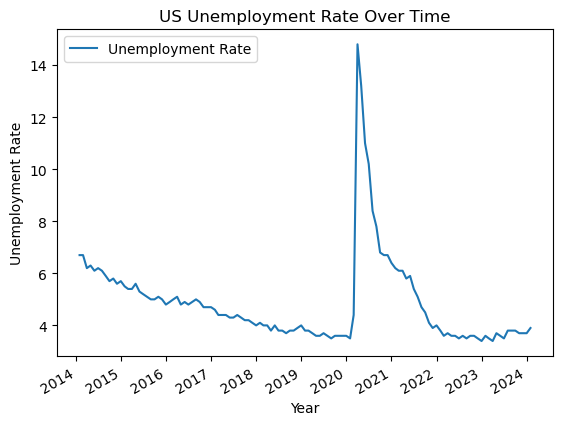

In [17]:
plt.plot(unemployment_df['Date'], unemployment_df['Unemployment Rate'], label="Unemployment Rate")
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('US Unemployment Rate Over Time')
plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.show()

This also happened in the financial crash as one would expect in 2008 which introduces the issue of how one should deal with such spikes.

---

***Task 4.2*** **:** More Information About The Distribution

Before we continue we also want to get a good understanding more information about the unemployment rate and the data it comes with. To visualize this I have decided to use a box and whisker plot which allows us to get a general idea of the min, max, and the percentile range we should expect which will come in handy in analyzing how unemployment rate affects the currency pairs themselves.

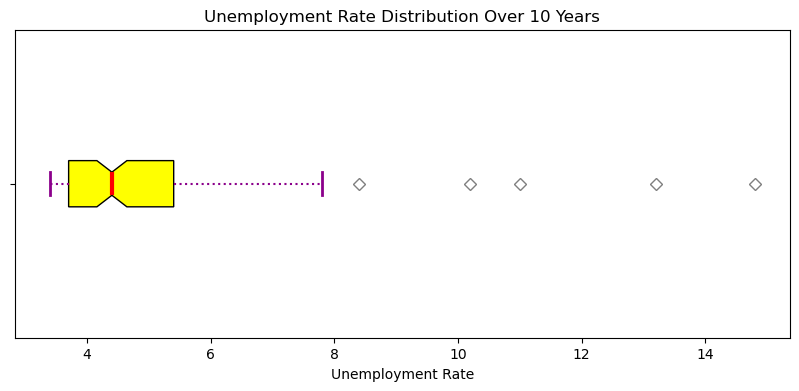

In [18]:
fig = plt.figure(figsize =(10, 4))
ax = fig.add_subplot(111)

bp = ax.boxplot(unemployment_df["Unemployment Rate"], patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#FFFF00']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
ax.set_yticklabels([''])
 
plt.title("Unemployment Rate Distribution Over 10 Years")

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Unemployment Rate')

plt.show()


By the box and whisker plot we are able to visually reiterate the presence of outliers which occured during the covid period. However in addition to that we are able to see that our median is around 4.3 and that in the past 10 years we have never been able to get an unemployment rate less than around 3.5. This helps us focus on reasonable differences such as whether or not a currencies price increases when it is reported as under the median.

To get a concrete idea of the unemployment rate we can also use the describe function to understand the data better

In [19]:
unemployment_df.describe()

,Unemployment Rate
count,121.000000
mean,4.861157
std,1.764623
min,3.400000
25%,3.700000
50%,4.400000
75%,5.400000
max,14.800000


After using describe we are also able to understand the standard deviation of the dataframe which was surprising as it suggests that the unemployment rate is oftentimes relatively high above 5 percent. Using this we are able to identify potential profit opportunities.

---

***Task 4.3*** **:** Looking at Forex Pairs and Correlations

As we are working with forex pairs and unemployment rate I also wondered whether or not there was a correlation between the pairs themselves as they are all based off the US Dollar. This was an assumption that I had however there are other factors that affect it such as the economy of the other country, trade aggrements, embargoes, war, and much more.

To visualize how they related to each other I decided to plot out the individual closing prices of my currencies over a 10 year gap on the same graph to estimate how much they differed from one another

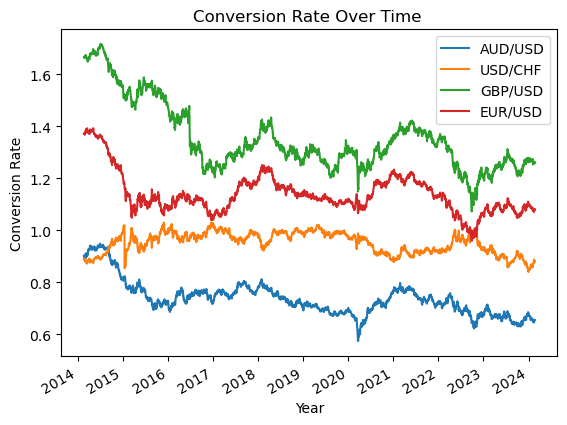

In [20]:
plt.plot(audusd_df['Date'], audusd_df['Close'], label = "AUD/USD")
plt.plot(usdchf_df['Date'], usdchf_df['Close'], label = "USD/CHF")
plt.plot(gbpusd_df['Date'], gbpusd_df['Close'], label = "GBP/USD")
plt.plot(eurusd_df['Date'], eurusd_df['Close'], label = "EUR/USD")

# I decided to ignore USD/JPY for the moment as because it trades for 150 currently which makes the graph unreadable
# plt.plot(usdjpy_df['Date'], usdjpy_df['Close'])

plt.xlabel('Year')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate Over Time ')
plt.gcf().autofmt_xdate()
plt.legend(loc="upper right")
plt.show()

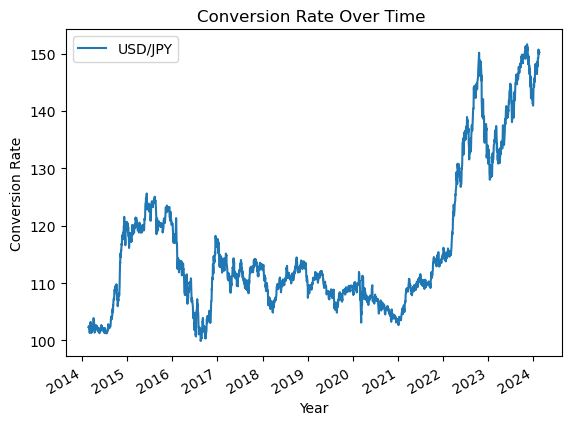

In [21]:
#USD/JPY by itself to show the difference
plt.plot(usdjpy_df['Date'], usdjpy_df['Close'], label = "USD/JPY")

plt.xlabel('Year')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate Over Time ')
plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.show()

Other than the USD/JPY pair there seemed to be a correlation between most of the pairs and I decided to test this by creating a correlation matrix between all of the separate pairs.

Let's create a dataframe with all the closing prices for all forex pairs. We also know that they are ordered correctly with the same length and dates in place so we can continue accordingly.

In [22]:
df = pd.DataFrame([])
df['Date'] = gbpusd_df['Date']
df['GBP/USD'] = gbpusd_df['Close']
df['EUR/USD'] = eurusd_df['Close']
df['AUD/USD'] = audusd_df['Close']
df['USD/JPY'] = usdjpy_df['Close']
df['USD/CHF'] = usdchf_df['Close']

corr_matrix = df.corr(numeric_only=True)
corr_matrix

,GBP/USD,EUR/USD,AUD/USD,USD/JPY,USD/CHF
GBP/USD,1.000000,0.725762,0.795945,-0.359831,-0.219661
EUR/USD,0.725762,1.000000,0.828202,-0.600479,-0.368048
AUD/USD,0.795945,0.828202,1.000000,-0.530205,-0.152599
USD/JPY,-0.359831,-0.600479,-0.530205,1.000000,-0.231432
USD/CHF,-0.219661,-0.368048,-0.152599,-0.231432,1.000000


It should also be noted that we have to take into account that for JPY and CHF the USD is actually the base currency in those cases instead of being the quote currency as it is in GBP, EUR, and AUD. To fix this I will negate the negative correlations that arise which are assuming USD as the quote currency. However we have to keep in mind to not change the JPY to CHF correlations as those pairs are in the correct correlation with one another.

In [23]:
chfusd_val = corr_matrix.at['USD/JPY','USD/CHF']

corr_matrix['GBP/USD'] = corr_matrix['GBP/USD'].apply(lambda x: -x if x < 0.0 else x)
corr_matrix['EUR/USD'] = corr_matrix['EUR/USD'].apply(lambda x: -x if x < 0.0 else x)
corr_matrix['AUD/USD'] = corr_matrix['AUD/USD'].apply(lambda x: -x if x < 0.0 else x)
corr_matrix['USD/JPY'] = corr_matrix['USD/JPY'].apply(lambda x: -x if x < 0.0 else x)
corr_matrix['USD/CHF'] = corr_matrix['USD/CHF'].apply(lambda x: -x if x < 0.0 else x)

#Re negating the columns regarding JPY and CHF
corr_matrix.at['USD/JPY','USD/CHF'] = chfusd_val
corr_matrix.at['USD/CHF','USD/JPY'] = chfusd_val 	
corr_matrix

,GBP/USD,EUR/USD,AUD/USD,USD/JPY,USD/CHF
GBP/USD,1.000000,0.725762,0.795945,0.359831,0.219661
EUR/USD,0.725762,1.000000,0.828202,0.600479,0.368048
AUD/USD,0.795945,0.828202,1.000000,0.530205,0.152599
USD/JPY,0.359831,0.600479,0.530205,1.000000,-0.231432
USD/CHF,0.219661,0.368048,0.152599,-0.231432,1.000000


Through this we actually get a lot of insight on how different currencies may interact with each other. For example with GBP and the EUR they seem to be correlated with each other relatively strongly because they are close together and most likely have relatively similar industries. We also see that CHF tends to not correlate strongly with any of the other currencies and even has a negative correlation with JPY. However something that was interesting was that AUD/USD had the strongest correlation of the whole group and as a whole I believe on avarage it correlated with the most currencies